<img style='float:left' src='https://omegaml.omegaml.io/static/logo.a3fc30c8aa01.jpg'>
<br><br><br><br>

**Work with data & machine learning models**

* easily store data in a high-performance data cluster (MongoDB)
* store your fitted or unfitted scikit-learn models
* run predictions on the compute cluster directly from stored data
* store & use remote data (ftp, http, s3)

**Easily use compute resources in the cluster**

* fit models in the compute cluster, in parallel
* perform grid search
* all asynchronously

**Share data, notebooks**

* write, store & share notebooks directly online, no setup required
* run jobs on a regular schedule
* share notebooks and data across users

**Automatic REST API for any client**

* datasets
* models
* jobs (reports)
* arbitrary custom scripts (python)

**On-Premise or On-Cloud Custom Installation**

* customizable backends (e.g. Spark, R, SAS)
* custom runtimes (e.g. dask, Spark)
* arbitrary data storage extensions API
* custom data types extensions API
* native-Python data streaming API (like Spark Streaming, much simpler)

In [35]:
!pip install pandas_datareader tqdm

    100% |████████████████████████████████| 51kB 2.6MB/s ta 0:00:011


In [2]:
# list datasets stored in cluster
om.datasets.list()

['_fitX_072e9ae7b02f44949b62a825a0ee7d7a',
 '_fitX_0e84281bc6004436bfce233c7107388b',
 '_fitX_179c72bea05d4fd487297db50c14fe4e',
 '_fitX_26646d9ec4234a079a6f355dba8527bf',
 '_fitX_3789ccdde4494f3b8bb45af4f95045a0',
 '_fitX_5db75a17dece46e6816e03384a2d0ad3',
 '_fitX_5ef779a3ede64e72b192459b68ee85ea',
 '_fitX_6b491ad55fce486b811e6994b2de88bb',
 '_fitX_7bd02e2e3bb84c83b33d1b7b92b622ea',
 '_fitX_7d6130db052d49eb93e0b52016f0aa9d',
 '_fitX_9e6994fa85334feeb5057fdf3d5ae63b',
 '_fitX_bd313b53c56143c28999579f54a51312',
 '_fitX_c2783821db214b6fbf97088e520d7747',
 '_fitY_2c04002b9f1b429b82a4f2049f83a508',
 '_fitY_3e8edac304b342a08f90f0812426db88',
 '_fitY_49b4155dd754494fab3d544c9ad813ed',
 '_fitY_5175fa3e441b42b591356a5e8c29f44a',
 '_fitY_695221030f284f94b44e4afce2d13730',
 '_fitY_70911475ae86493cb61c92b3ae703cbe',
 '_fitY_81aa65781a72463e91be9ae3582c0088',
 '_fitY_917047748dc14ab5a39dd6fa065ece60',
 '_fitY_94b04e2a2efd4b1b99d70072825e4a28',
 '_fitY_989eb02462eb41f7958f931a98f957b4',
 '_fitY_af2

In [3]:
# list models stored in clusters
om.models.list()

['google-predict',
 'iris-model',
 'iris-model.2018-04-17T19:27:05.167912.gs',
 'iris-model.2018-04-17T19:28:30.730810.gs',
 'iris-model.2018-04-17T20:15:11.141411.gs',
 'iris-model.2018-04-17T20:16:03.073222.gs',
 'iris-model.2018-04-17T20:16:21.293025.gs']

In [4]:
# list jobs & results stored in cluster
om.jobs.list()

['Untitled.ipynb',
 'regular.ipynb',
 'results/regular_1523987251.ipynb',
 'results/regular_1523991504.ipynb',
 'results/regular_1523991507.ipynb',
 'results/regular_1523991509.ipynb',
 'results/regular_1523992499.ipynb',
 'results/regular_1523996329.ipynb']

In [5]:
# list custom scripts stored in cluster
om.scripts.list()

['helloworld']

In [6]:
# store any python data
om.datasets.put(['any data'], 'mydata')
om.datasets.get('mydata')

[['any data'], ['any data'], ['any data'], ['any data']]

In [9]:
# store numpy arrays and pandas dataframes
import pandas as pd
from sklearn.datasets import load_iris
X, y = load_iris(True)
data = pd.DataFrame(X)
data['y'] = y
data.head()
om.datasets.put(data, 'iris')
om.datasets.get('iris').head()

,0,1,2,3,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# store remote datasets as a reference (no copy)
om.datasets.put('http://data.cityofnewyork.us/api/views/kku6-nxdu/rows.csv?accessType=DOWNLOAD', 'demographics')
om.datasets.get('demographics')

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100
5,10006,6,2,0.33,4,0.67,0,0,6,100,...,6,100,0,0.00,6,1.00,0,0,6,100
6,10007,1,0,0.00,1,1.00,0,0,1,100,...,1,100,1,1.00,0,0.00,0,0,1,100
7,10009,2,0,0.00,2,1.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100
8,10010,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
9,10011,3,2,0.67,1,0.33,0,0,3,100,...,3,100,0,0.00,3,1.00,0,0,3,100


In [14]:
# store financial time series including indicies
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 1, 31)
prices = web.DataReader("GOOGL", 'yahoo', start, end)
prices.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,811.440002,796.890015,800.619995,808.010010,1959000,808.010010
2017-01-04,813.429993,804.109985,809.890015,807.770020,1515300,807.770020
2017-01-05,813.739990,805.919983,807.500000,813.020020,1340500,813.020020
2017-01-06,828.960022,811.500000,814.989990,825.210022,2017100,825.210022
2017-01-09,830.429993,821.619995,826.369995,827.179993,1406800,827.179993


In [15]:
# get data back in their original format
om.datasets.put(prices, 'google', append=False)
prices = om.datasets.get('google')
prices.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-03,808.010010,808.010010,811.440002,796.890015,800.619995,1959000
2017-01-04,807.770020,807.770020,813.429993,804.109985,809.890015,1515300
2017-01-05,813.020020,813.020020,813.739990,805.919983,807.500000,1340500
2017-01-06,825.210022,825.210022,828.960022,811.500000,814.989990,2017100
2017-01-09,827.179993,827.179993,830.429993,821.619995,826.369995,1406800


In [16]:
# filter data in the database -- notice the nice syntax
%time om.datasets.get('google', Close__gte=900, Close__lte=920)

CPU times: user 20.4 ms, sys: 0 ns, total: 20.4 ms
Wall time: 22 ms


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-07-03,919.460022,919.460022,934.23999,915.309998,933.219971,1694800


In [60]:
# filter & aggregate data locally (let's make it large)
from tqdm import tqdm
N = 1e6
ldf_google_large = om.datasets.getl('google-large')
dupl = int((N - len(ldf_google_large or [])) / len(prices) + 1)
print(N, dupl, len(prices), len(ldf_google_large or []))
for i in tqdm(range(dupl)):
    om.datasets.put(prices, 'google-large')
print("google-large has {} records".format(len(om.datasets.getl('google-large'))))


0it [00:00, ?it/s]

1000000.0 0 272 1000144
google-large has 1000144 records


In [61]:
# filter & aggregate data locally (let's make it large)
def getdata():
  data = om.datasets.get('google-large')
  return data[(data.Close >= 900) & (data.Close <= 920)].mean() 

%time getdata()

CPU times: user 7.56 s, sys: 263 ms, total: 7.82 s
Wall time: 8.13 s


Adj Close    9.194600e+02
Close        9.194600e+02
High         9.342400e+02
Low          9.153100e+02
Open         9.332200e+02
Volume       1.694800e+06
dtype: float64

In [62]:
# filter and aggregate by database - 2-3x faster
%time om.datasets.getl('google-large', Close__gte=900, Close__lte=920).mean().iloc[0]

CPU times: user 10 ms, sys: 273 µs, total: 10.3 ms
Wall time: 365 ms


Adj Close_mean    9.194600e+02
Close_mean        9.194600e+02
High_mean         9.342400e+02
Low_mean          9.153100e+02
Open_mean         9.332200e+02
Volume_mean       1.694800e+06
Name: 0, dtype: float64

In [69]:
# index based access by loading data first
def getdata():
    dfx = om.datasets.get('google-large')
    return dfx.loc[pd.to_datetime('2017-01-03')]
%time getdata()

CPU times: user 7.13 s, sys: 280 ms, total: 7.41 s
Wall time: 7.7 s


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000


In [70]:
# index-based access directly in database
dfx = om.datasets.getl('google-large')
%time dfx.loc[pd.to_datetime('2017-01-03')].value

CPU times: user 32.4 ms, sys: 4.04 ms, total: 36.5 ms
Wall time: 57.2 ms


,Adj Close,Close,High,Low,Open,Volume
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000
2017-01-03,808.01001,808.01001,811.440002,796.890015,800.619995,1959000


(268, 2) (268,)


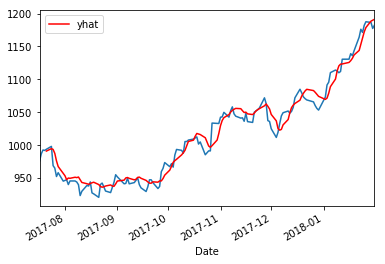

In [71]:
# train models locally
%matplotlib inline
import pandas as pd 

from sklearn.svm import SVR

prices = om.datasets.get('google')
X = prices[['High', 'Low']].rolling(5).mean().dropna()
y = prices.iloc[4:]['Close']
print(X.shape, y.shape)

train_loc = X.shape[0] // 2

model = SVR(kernel='linear', tol=0.1)
model.fit(X.iloc[0:train_loc], y.iloc[0:train_loc])

r2 = model.score(X, y)
yhat = pd.DataFrame({'yhat': model.predict(X[train_loc:])})
yhat.index = X.index[train_loc:]

ax = prices.iloc[train_loc:]['Close'].plot()
yhat.plot(color='r', ax=ax)

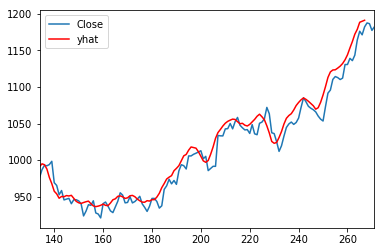

In [87]:
# predict remotely

# store models and new data
om.models.put(model, 'google-predict')
om.datasets.put(X[train_loc:], 'google-rolling', append=False)

# then predict remotely
pred = om.runtime.model('google-predict').predict('google-rolling[High,Low]').get()

# show results
pred = pd.DataFrame({'yhat': pred}, index=range(len(pred)))
actual = om.datasets.get('google[Close]').iloc[train_loc:]
pred.index = actual.index[:len(pred)]
ax = actual.plot()
pred.plot(color='r', ax=ax)

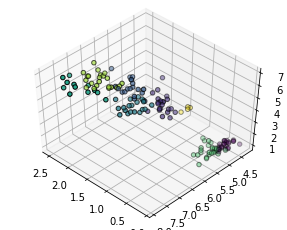

In [155]:
# we can also train remote
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X)
df['y'] = y

from sklearn.cluster import KMeans
model = KMeans(n_clusters=8)

# fit & predict remote
om.models.drop('iris-model', True)
om.models.put(model, 'iris-model')
om.runtime.model('iris-model').fit(X, y).get()

# get back remote fitted model and show results
model = om.models.get('iris-model')
labels = model.labels_

fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')
fig.show()

In [156]:
# we store lots of information on models
om.models.metadata('iris-model').attributes

{'metaX': {'_id': ObjectId('5c8bdefbbabee000f8caceb2'),
  'name': '_fitX_db6728d28d614f56ae3a3ebbdff63487',
  'bucket': 'omegaml',
  'prefix': 'data/',
  'kind': 'pandas.hdf',
  'gridfile': ObjectId('5c8bdefbbabee000f8caceb0'),
  'kind_meta': {},
  'attributes': {},
  's3file': {},
  'created': datetime.datetime(2019, 3, 15, 17, 20, 59, 610000)},
 'metaY': {'_id': ObjectId('5c8bdefbbabee000f8caceb5'),
  'name': '_fitY_2d8f5e327d9c499cb22fb683e1a5d60b',
  'bucket': 'omegaml',
  'prefix': 'data/',
  'kind': 'pandas.hdf',
  'gridfile': ObjectId('5c8bdefbbabee000f8caceb3'),
  'kind_meta': {},
  'attributes': {},
  's3file': {},
  'created': datetime.datetime(2019, 3, 15, 17, 20, 59, 623000)},
 'scikit-learn': '0.20.3'}

In [157]:
# perform gridsearch on cluster
om.datasets.put(df, 'iris', append=False)
params = {
            'n_clusters': range(1,8),
         }
meta = om.runtime.model('iris-model').gridsearch('iris[^y]', 'iris[y]', parameters=params).get()
meta.name

'iris-model'

In [160]:
# see what gridsearch results we have
om.models.metadata('iris-model')['attributes']['gridsearch']

[{'datetime': datetime.datetime(2019, 3, 15, 17, 21, 17, 707000),
  'Xname': 'iris[^y]',
  'Yname': 'iris[y]',
  'gsModel': 'iris-model.2019-03-15T17:21:17.707470.gs'}]

In [161]:
# look at gridsearch results
gs = om.models.get('iris-model.2019-03-15T17:21:17.707470.gs')
gs.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [162]:
# use the model REST API 
import requests
from omegacommon.auth import OmegaRestApiAuth
auth = OmegaRestApiAuth(**auth_config)
om.datasets.put(X, 'iris')
resp = requests.get('https://omegaml.omegaml.io/api/v1/model/iris-model/predict/?datax=iris', auth=auth)
resp.json()

{'datax': 'iris',
 'datay': None,
 'result': [5,
  0,
  0,
  0,
  5,
  5,
  0,
  5,
  0,
  0,
  5,
  0,
  0,
  0,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  0,
  5,
  0,
  0,
  5,
  5,
  5,
  0,
  0,
  5,
  5,
  5,
  0,
  0,
  5,
  5,
  0,
  5,
  5,
  0,
  0,
  5,
  5,
  0,
  5,
  0,
  5,
  0,
  3,
  3,
  3,
  1,
  3,
  1,
  3,
  7,
  3,
  1,
  7,
  1,
  1,
  3,
  1,
  3,
  1,
  1,
  3,
  1,
  2,
  1,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  1,
  1,
  1,
  1,
  2,
  1,
  3,
  3,
  3,
  1,
  1,
  1,
  3,
  1,
  7,
  1,
  1,
  1,
  3,
  7,
  1,
  6,
  2,
  4,
  6,
  6,
  4,
  1,
  4,
  6,
  4,
  6,
  2,
  6,
  2,
  2,
  6,
  6,
  4,
  4,
  2,
  6,
  2,
  4,
  2,
  6,
  4,
  2,
  2,
  6,
  4,
  4,
  4,
  6,
  2,
  2,
  4,
  6,
  6,
  2,
  6,
  6,
  6,
  2,
  6,
  6,
  6,
  2,
  6,
  6,
  2]}

In [163]:
# use the datasets REST API 
import requests
from omegacommon.auth import OmegaRestApiAuth
auth = OmegaRestApiAuth(**auth_config)
om.datasets.put(df, 'iris', append=False)
resp = requests.get('https://omegaml.omegaml.io/api/v1/dataset/iris/', auth=auth)
resp.json()

{'data': {'0': {'0': 5.1,
   '1': 4.9,
   '2': 4.7,
   '3': 4.6,
   '4': 5.0,
   '5': 5.4,
   '6': 4.6,
   '7': 5.0,
   '8': 4.4,
   '9': 4.9,
   '10': 5.4,
   '11': 4.8,
   '12': 4.8,
   '13': 4.3,
   '14': 5.8,
   '15': 5.7,
   '16': 5.4,
   '17': 5.1,
   '18': 5.7,
   '19': 5.1,
   '20': 5.4,
   '21': 5.1,
   '22': 4.6,
   '23': 5.1,
   '24': 4.8,
   '25': 5.0,
   '26': 5.0,
   '27': 5.2,
   '28': 5.2,
   '29': 4.7,
   '30': 4.8,
   '31': 5.4,
   '32': 5.2,
   '33': 5.5,
   '34': 4.9,
   '35': 5.0,
   '36': 5.5,
   '37': 4.9,
   '38': 4.4,
   '39': 5.1,
   '40': 5.0,
   '41': 4.5,
   '42': 4.4,
   '43': 5.0,
   '44': 5.1,
   '45': 4.8,
   '46': 5.1,
   '47': 4.6,
   '48': 5.3,
   '49': 5.0},
  '1': {'0': 3.5,
   '1': 3.0,
   '2': 3.2,
   '3': 3.1,
   '4': 3.6,
   '5': 3.9,
   '6': 3.4,
   '7': 3.4,
   '8': 2.9,
   '9': 3.1,
   '10': 3.7,
   '11': 3.4,
   '12': 3.0,
   '13': 3.0,
   '14': 4.0,
   '15': 4.4,
   '16': 3.9,
   '17': 3.5,
   '18': 3.8,
   '19': 3.8,
   '20': 3.4,
   '21'

In [170]:
# deploy lambda-style arbitrary algorithms
om.scripts.put('pkg:///app/omegapkg/demo/helloworld/', 'helloworld')

running sdist
running check


writing manifest file 'MANIFEST'
creating helloworld-1.0
creating helloworld-1.0/helloworld
making hard links in helloworld-1.0...
hard linking README -> helloworld-1.0
hard linking setup.py -> helloworld-1.0
hard linking helloworld/__init__.py -> helloworld-1.0/helloworld
creating /app/omegapkg/demo/helloworld/dist
Creating tar archive
removing 'helloworld-1.0' (and everything under it)


<Metadata: Metadata(bucket=omegaml,prefix=scripts/,kind=python.package,created=2018-04-17 19:53:15.270000)>

In [171]:
# run lambdas
from datetime import datetime
dtnow = datetime.now().isoformat()
om.runtime.script('helloworld').run(foo=dtnow).get()

{'script': 'helloworld',
 'kwargs': {'foo': '2019-03-15T17:26:21.497022'},
 'result': ('hello from helloworld', {'foo': '2019-03-15T17:26:21.497022'}),
 'runtime': 1.1e-05,
 'started': '2019-03-15T17:26:23.662634'}

In [172]:
# use REST API to run lambdas
import requests
from omegacommon.auth import OmegaRestApiAuth
auth = OmegaRestApiAuth(**auth_config)
resp = requests.post('https://omegaml.omegaml.io/api/v1/script/helloworld/run/', 
                     params=dict(foo=dtnow), auth=auth)
resp.json()

{'kwargs': {'foo': '2019-03-15T17:26:21.497022'},
 'result': ['hello from helloworld', {'foo': '2019-03-15T17:26:21.497022'}],
 'runtime': 1.1e-05,
 'script': 'helloworld',
 'started': '2019-03-15T17:26:28.086100'}

In [173]:
# run jobs (python notebooks) online
om.runtime.job('regular').run()
om.jobs.list()

['Untitled.ipynb',
 'regular.ipynb',
 'results/regular_1523987251.ipynb',
 'results/regular_1523991504.ipynb',
 'results/regular_1523991507.ipynb',
 'results/regular_1523991509.ipynb',
 'results/regular_1523992499.ipynb',
 'results/regular_1523996329.ipynb']

In [ ]:
# per-user online dashboard 
http://omegaml.omegaml.io/dashboard
    
# per-user online notebook automated setup
http://omjobs.omegaml.io/